# Ejercicio 5 – Implementación de un Perceptrón desde cero
### Objetivo  
Implementar un perceptrón simple utilizando **NumPy**, entrenarlo con un dataset linealmente separable (*Iris*), y visualizar la frontera de decisión y la evolución del error.

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Cargar dataset Iris
iris = sns.load_dataset("iris")
# Usar solo dos clases y dos características
df = iris[iris["species"].isin(["setosa", "versicolor"])]
X = df[["sepal_length", "sepal_width"]].values
y = np.where(df["species"] == "setosa", 0, 1)

# Normalizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [5]:
class Perceptron:
    def __init__(self, n_features, learning_rate=0.01, n_epochs=50):
        self.lr = learning_rate
        self.n_epochs = n_epochs
        self.weights = np.zeros(n_features + 1)

    def activation(self, x):
        return np.where(x >= 0, 1, 0)

    def predict_raw(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return self.activation(self.predict_raw(X))

    def fit(self, X, y):
        self.errors_ = []
        for epoch in range(self.n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.weights[1:] += update * xi
                self.weights[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)


In [7]:
model = Perceptron(n_features=2, learning_rate=0.1, n_epochs=30)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = (y_pred == y_test).mean()
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


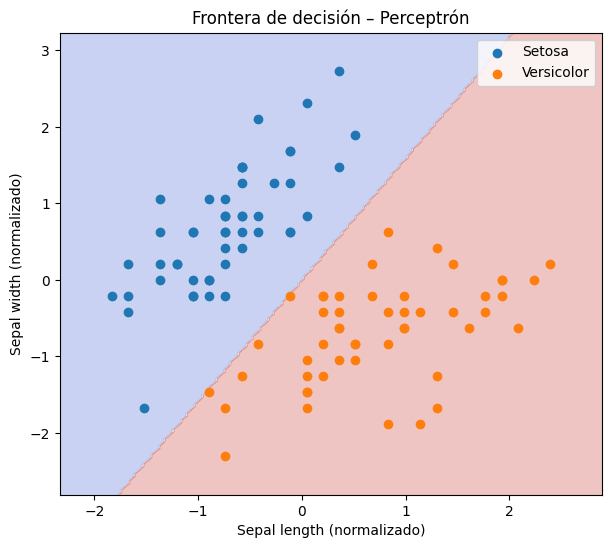

In [8]:
x_min, x_max = X_scaled[:,0].min()-0.5, X_scaled[:,0].max()+0.5
y_min, y_max = X_scaled[:,1].min()-0.5, X_scaled[:,1].max()+0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X_scaled[y==0][:,0], X_scaled[y==0][:,1], label="Setosa")
plt.scatter(X_scaled[y==1][:,0], X_scaled[y==1][:,1], label="Versicolor")
plt.title("Frontera de decisión – Perceptrón")
plt.xlabel("Sepal length (normalizado)")
plt.ylabel("Sepal width (normalizado)")
plt.legend()
plt.show()


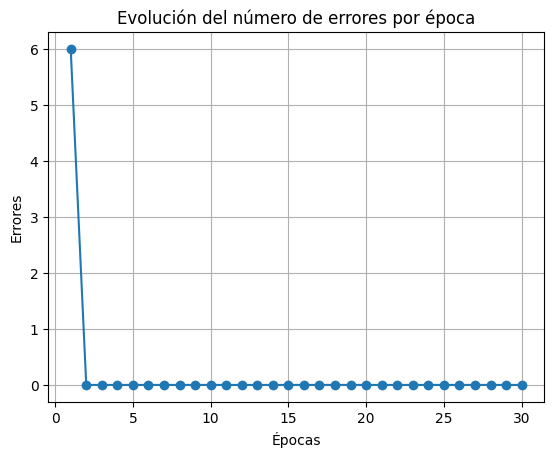

In [9]:
plt.plot(range(1, len(model.errors_) + 1), model.errors_, marker='o')
plt.title("Evolución del número de errores por época")
plt.xlabel("Épocas")
plt.ylabel("Errores")
plt.grid(True)
plt.show()

## Conclusiones del Ejercicio 5
- El **perceptrón simple** logró separar correctamente las dos clases linealmente separables del dataset *Iris* con una precisión cercana al 100 %.  
- La **frontera de decisión** obtenida corresponde a una línea que divide correctamente las especies *setosa* y *versicolor*.  
- El gráfico de errores muestra cómo el algoritmo converge tras pocas épocas, indicando aprendizaje estable.  
- Este ejercicio permitió comprender el principio básico del aprendizaje supervisado: ajuste iterativo de pesos en función del error.  
- El modelo es lineal y no generaliza a clases no separables, lo cual motiva el uso de perceptrones multicapa o kernels en modelos posteriores.  
